# **Laborator 3: Detecţia dreptelor cu Transformata Hough**

Obiectivul principal al acestei lucrări este studierea transformatei Hough pentru detecţia dreptelor în imagini binare.

## Fundamente teoretice

Se dă o imagine binară care conține o mulţime de puncte de interes (de exemplu puncte de muchii). Sarcina voastră este să găsiți dreptele determinate de aceste puncte de interes. În figura de mai jos, în stânga avem imaginea binară cu muchiile, iar in dreapta sunt marcate cu verde dreptele găsite de algoritmul Transformata Hough.

<p align="center">
  <img src="imgs/Hough_result.png" alt="image" width="500"/>
</p> 

**Ex 1. Citirea si vizualizarea datelor**: Citiţi o imagine din folderul 'prs_res_Hough'. 

102 102


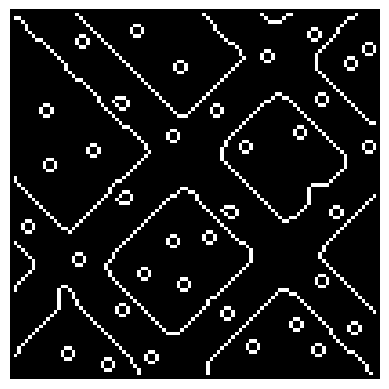

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('prs_res_Hough/edge_simple.bmp', cv2.IMREAD_GRAYSCALE)
height, width = image.shape

print(height, width)
plt.imshow(image, cmap='gray')
plt.axis('off') 
plt.show()


Metoda directă de a calcula drepte din fiecare pereche de puncte are o complexitate computațională ridicată de O(n²), și nu este aplicabilă pentru un număr mare de puncte. Transformata Hough a fost propusă și patentată de Peter Hough [1], și în varianta inițială, a fost o metodă de timp real pentru a număra câte puncte sunt plasate pe fiecare dreaptă posibilă dintr-o imagine. Această metodă se bazează pe reprezentarea dreptei sub formă pantă-termen liber (y=ax+b), și pe construirea unui spațiu parametric, numit și acumulator Hough.Pentru fiecare punct de interes din imagine se calculează toate dreptele posibile care trec prin el, şi se incrementează elementele din spaţiul parametric. Dreptele relevante sunt localizate în maximele locale ale spaţiului parametric. 

Această reprezentare este sub-optimală, deoarece nu este mărginită. Pentru a reprezenta toate
dreptele posibilele din imagine, panta şi termenul liber trebuie să varieze în domeniul -∞ şi +∞.
Modificările propuse de Duda şi Hart [2] au făcut transformata Hough populară în domeniul
viziunii artificiale. Principala problemă legată de parametri nemărginiţi a fost rezolvată prin
parametrizarea normală a dreptei. Parametrizarea normală a
unei drepte constă în reprezentarea dreptei prin vectorul normal (perpendicular) şi distanţa de
la origine. Reprezentarea normală se mai numeşte şi reprezentarea ρ-θ (Figura 3.1).

<p align="center">
  <img src="imgs/model_dreapta.png" alt="image" width="600"/>
</p> 

O dreaptă poate fi reprezentată folosind parametrii ρ și θ:

$$\rho = x \cdot \cos(\theta) + y \cdot \sin(\theta) \tag{1}$$

În această formulă:
- $\rho$ este distanța de la origine
- $\theta$ este unghiul făcut de normala dreptei cu axa x


Parametrii ρ și θ pot avea o infinitate de valori. Pentru a descreşte complexitatea computaţională se introduce cuantizarea parametrilor ρ și θ, proces prin care se constrâng parametrii să aibă un număr finit de valori. Parametrii ρ si θ au un interval de variaţie limitat deoarece imaginea are o dimensiune finită. Valoarea maximă pentru ρ este diagonala imaginii. În funcție de intervalul ales pentru θ, există două configuraţii echivalente pentru domeniul parametrilor. Prima este cea propusă în articolul original iar noi o vom adopta pe a doua.

$$
\begin{align*}
1. &\ \theta \in [-90^\circ, 90^\circ) \, \text{or} \, \theta \in [0,180^\circ), \, \rho \in [-\rho_{\text{max}}, +\rho_{\text{max}}] \tag{2} \\
2. &\ \theta \in [0, 360^\circ), \, \rho \in [0, +\rho_{\text{max}}]
\end{align*}
$$

De asemenea, pentru fiecare dintre cei doi parametri ai dreptei se stabileşte un nivel de
cuantizare care depinde de acurateţea cerută (de exemplu: pasul pentru ρ poate fi de 10, 1, 0.5
pixeli etc., iar pasul pentru θ poate fi de 10 grade, 1 grad, 0.5 grade etc.).
În general printr-un punct din planul imagine ($x_0, y_0$), putem defini un set de drepte care trec
prin punctul respectiv la diferite unghiuri θ. Având ($x_0, y_0$) și θ, parametrul dreptei ρ se poate
calcula conform ecuatiei **(2)**. Pentru a detecta dreptele dintr-o imagine, algoritmul Hough
foloseste o schemă de votare: fiecare punct de interes
($x_0, y_0$), de exemplu pixelii de pe muchii, votează pentru toate dreptele cu parametrii (ρ, θ) care
trec prin punctul respectiv. Dreptele care primesc cele mai multe voturi sunt considerate
dreptele finale detectate de algoritmul Hough. Un exemplu este prezentat in Figura 3.2. 

<p align="center">
  <img src="imgs/Hough_lines.png" alt="image" width="600"/>
</p> 

Pentru a stoca voturile, algoritmul Hough folosește un vector 2D (matrice), denumit **acumulatorul Hough (H)**. Acesta reprezintă spațiul parametrilor (ρ, θ) cuantizați ai dreptei. Pașii de cuantizare pentru ρ și θ sunt $Δρ$ și $Δθ$, respectiv. Valorile lor maxime sunt $ρ_{max}$ și $θ_{max}$. Atunci acumulatorul va avea o dimensiune de $(ρ_{max}/Δρ \times θ_{max}/Δθ)$. Operația de incrementare a unei locații Hough poate fi ponderată – de exemplu cu modulul gradientului. Acumulatorul pentru imaginea exemplu de mai sus se poate vizualiza:

<p align="center">
  <img src="imgs/Hough_acc.png" alt="image" width="400"/>
</p> 


După ce am construit acumulatorul, dreptele relevante se extrag ca maxime locale ale acestuia. Un maxim local este un punct unde valoarea din acumulator este mai mare decât toate valorile dintr-o vecinătate (pătratică). Algoritmul Hough este următorul:

<p align="center">
  <img src="imgs/hough_alg.png" alt="image" width="600"/>
</p> 

Parametrii algoritmului Hough sunt următorii:
- **P** - o imagine binară
- **$θ_{max}$** - valoarea maximă pe care o poate lua θ
- **$ρ_{max}$** - valoarea maximă pe care o poate lua ρ
- **H** - acumulator cu elemente intregi (int) de dimensiune $(\frac{ρ_{max}}{Δρ} + 1) \times (\frac{θ_{max}}{Δρ})$
- **Δθ** - pasul pentru θ
- **Δρ** - pasul pentru ρ
- **n** – dimensiunea ferestrei pentru determinarea maximului local
- **T** – numărul minim de voturi (sau echivalent numărul minim de puncte) pentru ca o dreaptă să fie considerată validă
- **k** – numărul de drepte dorit

**Ex 2. Construirea acumulatorului Hough:** Calculați acumulatorul Hough folosind pașii (1) si (2) din algoritmul de mai sus. Vizualizați acumulatorul. 

Folosiți următorii parametrii: $$\theta_{max}=360 \text{(grade)}$$ $$ρ_{max}=\sqrt{height^2 + width^2} (\text{height și width fiind dimensiunile imaginii})$$ $$Δθ=1$$ $$Δρ=1$$ 

**Hint 1:** Pentru folosirea ecuației dreptei (1), $\theta$ va trebui transformat din grade in radiani conform formulei $\theta_{rad} = \theta * \pi/180$

**Hint 2:** Dimensiunea acumulatorului H va fi $(\frac{ρ_{max}}{Δρ} + 1) \times (\frac{θ_{max}}{Δρ})$. Tipul H va fi int.

In [ ]:
###YOUR CODE HERE###
import math
theta_max = 360
ro_max = int(math.sqrt(height*height + width*width))
d_t = 1
d_p = 1
H = np.zeros((ro_max,theta_max), dtype = int)
for i in range(height):
    for j in range(width):
        if image[i][j] == 255:
            for theta in range(0, theta_max, d_t):
                theta_rad = theta * math.pi / 180 
                #print(theta_rad)
                ro = i * np.cos(theta_rad) + j * np.sin(theta_rad)


0.0
0.017453292519943295
0.03490658503988659
0.05235987755982988
0.06981317007977318
0.08726646259971647
0.10471975511965977
0.12217304763960307
0.13962634015954636
0.15707963267948966
0.17453292519943295
0.19198621771937624
0.20943951023931953
0.22689280275926285
0.24434609527920614
0.2617993877991494
0.2792526803190927
0.29670597283903605
0.3141592653589793
0.3316125578789226
0.3490658503988659
0.3665191429188092
0.3839724354387525
0.40142572795869574
0.41887902047863906
0.4363323129985824
0.4537856055185257
0.47123889803846897
0.4886921905584123
0.5061454830783556
0.5235987755982988
0.5410520681182421
0.5585053606381855
0.5759586531581288
0.5934119456780721
0.6108652381980153
0.6283185307179586
0.6457718232379019
0.6632251157578452
0.6806784082777885
0.6981317007977318
0.715584993317675
0.7330382858376184
0.7504915783575616
0.767944870877505
0.7853981633974483
0.8028514559173915
0.8203047484373349
0.8377580409572781
0.8552113334772214
0.8726646259971648
0.890117918517108
0.907571211

**Ex3.** Găsiți primele k maxime locale (punctele cu cele mai multe voturi) din acumulator și apoi afișați cele k drepte detectate pe imaginea originală.
Pentru parametrii $T$ și $k$ incercați mai multe valori. Pentru $n$ folosiți 3x3, 7x7 sau 11x11. 

**Hint 1:** Pentru a selecta o fereastră de o anumită dimensiune puteți folosi conceptul de array **slicing**. Slicing-ul trebuie aplicat simultan pe ambele dimensiuni. Pentru a sorta un șir se poate folosi funcția **sorted**.

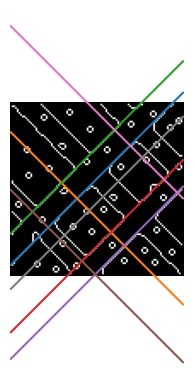

In [13]:
###YOUR CODE HERE###



### **Concluzie**
În acest laborator, ați învățat cum să aplicați algoritmul Transformata Hough pentru a detecta drepte în imagini binare.

**Referinte**

[1] P. Hough, “Method and means for recognizing complex patterns”, US patent 3,069,654,
1962

[2] R. O. Duda and P. E. Hart, "Use of the Hough Transformation to Detect Lines and Curves
in Pictures," Comm. ACM, Vol. 15, pp. 11–15, 1972

[3] D. H. Ballard, "Generalizing the Hough Transform to Detect Arbitrary Shapes", Pattern
Recognition, Vol.13, No.2, p.111-122, 1981.

[4] https://en.wikipedia.org/wiki/Hough_transform